In [167]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, validation_curve, KFold
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
import joblib
import seaborn as sns

# without outliers

In [179]:
pd.set_option('display.max_columns', None)

In [194]:
house_without_outliers_no100 = pd.read_csv('data/table/data_for_model(no_outliner,no_100).csv')

In [209]:
house_without_outliers_no100[house_without_outliers_no100['min_mrt'] > 124]

,id,section,parking_space,construction_time,trade_time,age,unit_price_ping,area,trasaction_floor,total_floor,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,year,month
8573,223242,22,1,840117,1010913,17,72099.498,63.80101,全,三層,0,2,3,1,3,1,1,122.15309,118.595539,124.226053,118.392227,116.826535,116.005962,114.766966,101,9


In [188]:
room2 = house_without_outliers_no100[house_without_outliers_no100['room'] == 2]

In [189]:
room2

,id,section,parking_space,construction_time,trade_time,age,unit_price_ping,area,trasaction_floor,total_floor,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,year,month,yearMonth
10,2,1,0,820504,1011122,19,115937.7118,30.878789,二層,十三層,2,0,2,1,2,1,1,3.216651,2.360415,6.347960,0.421408,0.259130,0.311712,0.082275,101,11,101-11
24,164,1,0,830615,1010827,18,127712.9714,32.886392,十一層,十三層,11,0,2,1,1,1,1,5.316817,2.220421,4.698467,1.820338,2.035106,0.409339,0.015357,101,08,101-08
26,173,1,0,830615,1011210,18,147782.4832,34.442667,十三層,十三層,13,0,2,2,2,1,1,5.309536,2.243316,4.718918,1.818142,2.036624,0.426111,0.033038,101,12,101-12
27,192,1,1,830615,1010821,18,111008.7640,43.059857,四層,十二層,4,0,2,1,1,1,1,5.343755,2.260041,4.697414,1.853702,2.072237,0.400359,0.036186,101,08,101-08
28,211,1,0,850217,1011022,16,136423.7544,18.361987,四層,十三層,4,0,2,1,1,1,1,5.284247,2.219225,4.727786,1.789384,2.006113,0.441365,0.048097,101,10,101-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222128,262707,23,1,1031121,1100504,6,351142.0760,73.047680,八層,十九層,8,0,2,2,2,1,1,11.721184,6.878530,2.359263,0.061926,0.115843,1.434132,1.378428,110,05,110-05
222135,263117,23,1,850601,1100322,24,277703.7290,31.904650,四層,十二層,4,0,2,2,1,1,1,11.341555,6.450752,1.922925,0.599818,0.474739,1.987565,1.926125,110,03,110-03
222138,263371,23,0,841101,1100306,25,318355.1516,19.632250,四層,七層,4,3,2,1,1,1,1,13.460652,8.689844,4.226633,0.586618,1.200066,0.167921,0.538190,110,03,110-03
222143,263457,23,0,840617,1100501,25,257326.7778,29.923180,七層,七層,7,3,2,2,2,1,1,13.480357,8.650014,4.211903,0.623180,1.199753,0.299057,0.555844,110,05,110-05


In [193]:
house_without_outliers_no100[house_without_outliers_no100['floor'] == 0]

,id,section,parking_space,construction_time,trade_time,age,unit_price_ping,area,trasaction_floor,total_floor,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,year,month,yearMonth
0,115,1,0,780420,1011005,23,161561.0576,51.373997,全,四層,0,2,6,1,3,1,0,5.289176,2.136603,4.675329,1.778556,1.982863,0.413375,0.091651,101,10,101-10
1,1325,1,0,980803,1011221,3,186556.2114,72.364574,全,四層,0,2,4,3,4,1,1,6.228412,2.206407,3.732542,2.628068,2.828270,0.299191,0.335365,101,12,101-12
2,1335,1,1,1010829,1010926,0,194843.8520,79.551239,全,四層,0,2,5,2,4,1,0,6.412179,2.229165,3.523136,2.476814,2.995116,0.393358,0.494201,101,09,101-09
3,1340,1,1,1010829,1011018,0,212830.7098,80.815769,全,四層,0,2,5,2,4,1,0,6.411096,2.227065,3.523009,2.477876,2.993802,0.393365,0.494690,101,10,101-10
4,1341,1,1,1010829,1010926,0,181452.0562,77.706827,全,四層,0,2,5,2,4,1,0,6.409919,2.224749,3.522849,2.479032,2.992369,0.393364,0.495219,101,09,101-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222041,361991,28,0,791124,1100330,30,208602.5916,71.907390,全,四層,0,2,4,2,2,1,0,4.260247,2.265569,7.954563,1.160369,0.327115,0.282279,0.185572,110,03,110-03
222042,363331,28,0,1081225,1100418,1,229164.6676,50.967950,全,三層,0,2,3,3,4,1,0,4.587341,1.375694,8.803339,3.281222,0.901163,1.471958,1.168530,110,04,110-04
222043,363886,28,1,970218,1100328,13,196622.3724,74.254350,全,三層,0,2,6,2,3,1,1,4.798755,2.179186,8.265221,1.779486,0.685676,0.232936,0.442518,110,03,110-03
222044,364956,28,0,720421,1100315,37,224767.9536,28.918840,全,二層,0,2,4,4,2,1,0,4.208949,1.495027,8.436349,2.785865,0.587097,1.246646,0.877800,110,03,110-03


In [190]:
room2['unit_price_ping'].mean()

299912.1438219971

In [3]:
house_without_outliers_no100['section'].unique()

array([ 1,  2,  3,  5,  6,  8, 10, 12, 14,  7, 18, 15, 19, 22, 23, 24, 20,
       16, 26,  4, 28,  9, 25, 27, 13, 21], dtype=int64)

#### create column yearMonth

In [4]:
house_without_outliers_no100['yearMonth'] = ""

In [5]:
house_without_outliers_no100['month'] = house_without_outliers_no100['month'].astype(str)

In [7]:
house_without_outliers_no100['month'] = house_without_outliers_no100['month'].apply(lambda x: "0"+x if len(x) == 1 else x)

In [64]:
house_without_outliers_no100['month'].unique()

array(['10', '12', '09', '11', '07', '08', '04', '06', '05', '01', '03',
       '02'], dtype=object)

In [65]:
house_without_outliers_no100['year'] = house_without_outliers_no100['year'].astype(str)

<ipython-input-65-6a1bce659045>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_without_outliers_no100['year'] = house_without_outliers_no100['year'].astype(str)


In [66]:
def testfunc(x, y):
    return x + '-' + y

In [67]:
house_without_outliers_no100['yearMonth'] = house_without_outliers_no100.apply(lambda value: testfunc(house_without_outliers_no100['year'], house_without_outliers_no100['month']))

<ipython-input-67-6af32b2df7c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_without_outliers_no100['yearMonth'] = house_without_outliers_no100.apply(lambda value: testfunc(house_without_outliers_no100['year'], house_without_outliers_no100['month']))


In [ ]:
# def testfunc(x, y):
#     return x + '-' + y

In [68]:
house_without_outliers_no100

,id,section,parking_space,construction_time,trade_time,age,unit_price_ping,area,trasaction_floor,total_floor,...,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,year,month,yearMonth
0,115,1,0,780420,1011005,23,161561.0576,51.373997,全,四層,...,5.289176,2.136603,4.675329,1.778556,1.982863,0.413375,0.091651,101,10,101-10
1,1325,1,0,980803,1011221,3,186556.2114,72.364574,全,四層,...,6.228412,2.206407,3.732542,2.628068,2.828270,0.299191,0.335365,101,12,101-12
2,1335,1,1,1010829,1010926,0,194843.8520,79.551239,全,四層,...,6.412179,2.229165,3.523136,2.476814,2.995116,0.393358,0.494201,101,09,101-09
3,1340,1,1,1010829,1011018,0,212830.7098,80.815769,全,四層,...,6.411096,2.227065,3.523009,2.477876,2.993802,0.393365,0.494690,101,10,101-10
4,1341,1,1,1010829,1010926,0,181452.0562,77.706827,全,四層,...,6.409919,2.224749,3.522849,2.479032,2.992369,0.393364,0.495219,101,09,101-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222145,263551,23,0,860110,1100312,24,266073.9246,27.811940,四層,九層,...,14.559923,7.253931,4.494443,1.968091,2.390621,1.562047,1.879605,110,03,110-03
222146,263621,23,1,850719,1100312,24,176675.1752,50.375160,三層,十六層,...,13.698958,8.115385,4.322924,1.099002,1.486816,0.900904,1.005336,110,03,110-03
222147,263750,23,0,720727,1100125,37,153564.3274,21.489460,三層,五層,...,11.778665,6.847308,2.359782,0.794523,0.691259,1.979402,1.898044,110,01,110-01
222148,263830,23,0,831124,1100520,26,241829.1874,16.540680,三層,八層,...,14.317320,7.841208,4.983899,1.499488,2.037043,1.107122,1.426402,110,05,110-05


In [69]:
house_without_outliers_no100 = house_without_outliers_no100[~house_without_outliers_no100['section'].isin([12, 13, 21, 25, 27])]

In [70]:
house_without_outliers_no100['section'].unique()

array([ 1,  2,  3,  5,  6,  8, 10, 14,  7, 18, 15, 19, 22, 23, 24, 20, 16,
       26,  4, 28,  9], dtype=int64)

In [16]:
# house_without_outliers_no100['yearMonthtest'] = ""
# house_without_outliers_no100['yearMonthtest'] = house_without_outliers_no100.apply(lambda value: testfunc(house_without_outliers_no100['year'], house_without_outliers_no100['month']))

In [71]:
yearMonth = house_without_outliers_no100['yearMonth'].reset_index(drop = True)

In [72]:
year = house_without_outliers_no100['year'].reset_index(drop = True)

In [73]:
house_without_outliers_no100.columns

Index(['id', 'section', 'parking_space', 'construction_time', 'trade_time',
       'age', 'unit_price_ping', 'area', 'trasaction_floor', 'total_floor',
       'floor', 'type', 'room', 'lr', 'bath', 'partition', 'mgmt', 'min_inci',
       'min_hos', 'min_mrt', 'min_mart', 'min_gas', 'min_school', 'min_park',
       'year', 'month', 'yearMonth'],
      dtype='object')

In [74]:
house_without_outliers_no100['section'].unique()

array([ 1,  2,  3,  5,  6,  8, 10, 14,  7, 18, 15, 19, 22, 23, 24, 20, 16,
       26,  4, 28,  9], dtype=int64)

In [75]:
house_without_outliers_no100_indata = house_without_outliers_no100.drop(columns = {'id', 'construction_time', 'trade_time', 'trasaction_floor', 'total_floor', 'year', 'month', 'yearMonth'})

In [76]:
house_without_outliers_no100_indata.columns

Index(['section', 'parking_space', 'age', 'unit_price_ping', 'area', 'floor',
       'type', 'room', 'lr', 'bath', 'partition', 'mgmt', 'min_inci',
       'min_hos', 'min_mrt', 'min_mart', 'min_gas', 'min_school', 'min_park'],
      dtype='object')

In [23]:
house_without_outliers_no100_indata.shape

(221501, 19)

# without outliers

In [104]:
# without get_dummies
X = house_without_outliers_no100_indata.drop(columns = {'unit_price_ping'})
Y = house_without_outliers_no100_indata['unit_price_ping']

# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# standardscaler
train_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_nor = train_scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X)
X_nor = scaler.transform(X)

# set regressor
regressor = xgb.XGBRegressor(
    n_estimators = 1500,
    max_depth = 7, 
    n_jobs = -1, 
    learning_rate = 0.1
)

regressor.fit(X_train_nor, Y_train)
# X_test_nor = scaler.transform(X_test)
Y_pred = regressor.predict(X_nor)

# print(f"without_outliers_r2: {r2_score(Y_test, Y_pred)}")
# print(f"without_outliers_mse: {mean_squared_error(Y_test, Y_pred)}")
# print(f"without_outliers_rmse: {mean_squared_error(Y_test, Y_pred, squared = False)}")
# print(f"without_outliers_mae: {mean_absolute_error(Y_test, Y_pred)}")

# # with get_dummies
# X = house_without_outliers_no100_gd.drop(columns = {'unit_price_ping'})
# Y = house_without_outliers_no100_gd['unit_price_ping']

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# # standardscaler
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_nor = scaler.transform(X_train)

# # set regressor
# regressor = xgb.XGBRegressor(
#     n_estimators = 1000,
#     max_depth = 5, 
#     n_jobs = -1
# )

# regressor.fit(X_train_nor, Y_train)
# X_test_nor = scaler.transform(X_test)
# Y_pred = regressor.predict(X_test_nor)

# print(f"with_get_dummies_r2: {r2_score(Y_test, Y_pred)}")
# print(f"with_get_dummies_mse: {mean_squared_error(Y_test, Y_pred)}")
# print(f"with_get_dummies_rmse: {mean_squared_error(Y_test, Y_pred, squared = False)}")
# print(f"with_get_dummies_mae: {mean_absolute_error(Y_test, Y_pred)}")

# 整份資料畫趨勢圖和特徵權重

In [116]:
Y_pred

0         195037.375000
1         231161.609375
2         214579.406250
3         221579.406250
4         221276.109375
              ...      
221496    211806.218750
221497    163348.625000
221498    145162.250000
221499    222199.000000
221500    201683.062500
Length: 221501, dtype: float32

In [117]:
Y_pred = pd.Series(Y_pred)

In [118]:
Y_pred

0         195037.375000
1         231161.609375
2         214579.406250
3         221579.406250
4         221276.109375
              ...      
221496    211806.218750
221497    163348.625000
221498    145162.250000
221499    222199.000000
221500    201683.062500
Length: 221501, dtype: float32

In [119]:
X_data = X.reset_index(drop = True)

In [120]:
whole_data = pd.concat([X_data, Y_pred], axis = 1)

In [121]:
whole_data = pd.concat([whole_data, yearMonth], axis = 1)

In [122]:
whole_data

,section,parking_space,age,area,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,0,yearMonth
0,1,0,23,51.373997,0,2,6,1,3,1,0,5.289176,2.136603,4.675329,1.778556,1.982863,0.413375,0.091651,195037.375000,101-10
1,1,0,3,72.364574,0,2,4,3,4,1,1,6.228412,2.206407,3.732542,2.628068,2.828270,0.299191,0.335365,231161.609375,101-12
2,1,1,0,79.551239,0,2,5,2,4,1,0,6.412179,2.229165,3.523136,2.476814,2.995116,0.393358,0.494201,214579.406250,101-09
3,1,1,0,80.815769,0,2,5,2,4,1,0,6.411096,2.227065,3.523009,2.477876,2.993802,0.393365,0.494690,221579.406250,101-10
4,1,1,0,77.706827,0,2,5,2,4,1,0,6.409919,2.224749,3.522849,2.479032,2.992369,0.393364,0.495219,221276.109375,101-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221496,23,0,24,27.811940,4,3,3,2,2,1,1,14.559923,7.253931,4.494443,1.968091,2.390621,1.562047,1.879605,211806.218750,110-03
221497,23,1,24,50.375160,3,0,3,2,2,1,1,13.698958,8.115385,4.322924,1.099002,1.486816,0.900904,1.005336,163348.625000,110-03
221498,23,0,37,21.489460,3,1,2,2,1,1,0,11.778665,6.847308,2.359782,0.794523,0.691259,1.979402,1.898044,145162.250000,110-01
221499,23,0,26,16.540680,3,3,1,1,1,1,1,14.317320,7.841208,4.983899,1.499488,2.037043,1.107122,1.426402,222199.000000,110-05


In [123]:
real_data_groupby = house_without_outliers_no100.groupby('yearMonth')

In [124]:
real_data_groupby.size()

yearMonth
101-01      17
101-02      19
101-03      40
101-04      52
101-05      67
          ... 
110-01     635
110-02    1133
110-03    2392
110-04    1931
110-05     478
Length: 113, dtype: int64

In [125]:
real_data_mean_list = []
for i in real_data_groupby.size().index.tolist():
    mean = real_data_groupby.get_group(i)['unit_price_ping'].mean()
    real_data_mean_list.append(mean)

In [126]:
predict_data_groupby = whole_data.groupby('yearMonth')
predict_data_groupby.size()
predict_data_mean_list = []
for i in predict_data_groupby.size().index.tolist():
    mean = predict_data_groupby.get_group(i)[0].mean()
    predict_data_mean_list.append(mean)

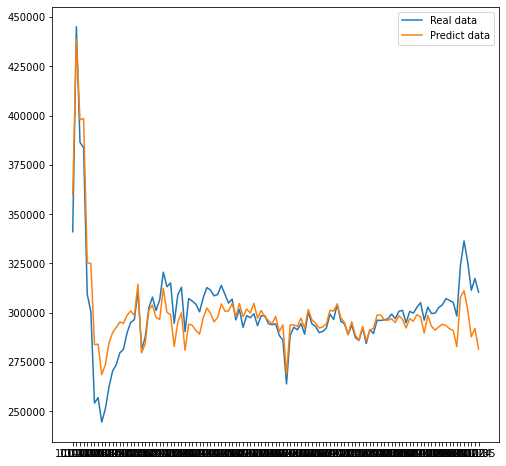

In [127]:
plt.figure(figsize = (8,8))
plt.plot(real_data_groupby.size().index, real_data_mean_list, label = 'Real data')
plt.plot(predict_data_groupby.size().index, predict_data_mean_list, label = 'Predict data')
plt.legend()
plt.show()

In [132]:
sorted_idx = regressor.feature_importances_.argsort()

<BarContainer object of 18 artists>

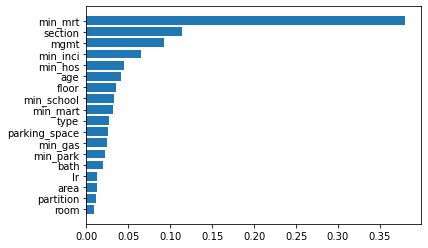

In [133]:
plt.barh(X_train.columns[sorted_idx], regressor.feature_importances_[sorted_idx])

In [134]:
joblib.dump(regressor, 'Model')

['Model']

In [135]:
joblib.load('Model')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# 各區畫特徵權重

In [143]:
house_model = joblib.load('Model')

In [144]:
house_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
house_model.feature_importances_

array([0.11344091, 0.02612263, 0.04133148, 0.01269001, 0.03480871,
       0.02697412, 0.00870172, 0.01274069, 0.01941819, 0.01192299,
       0.09198155, 0.06477339, 0.0446501 , 0.38000152, 0.03204231,
       0.02415112, 0.0324025 , 0.02184612], dtype=float32)

In [159]:
# group by each section
groupby_section = house_without_outliers_no100_indata.groupby('section')
groupby_section.size()

section
1      3465
2      2526
3     19264
4     10276
5      6046
6     11424
7     19459
8     18676
9      8463
10     3202
14    19848
15      693
16      871
18     7131
19     3218
20    16536
22    38878
23     1224
24    21521
26     6344
28     2436
dtype: int64

#### 計算各區r2(use house_model)

In [157]:
num = 0
for i in groupby_section.size().index:
    for_each_section_X = groupby_section.get_group(i).drop('unit_price_ping', axis = 1)
    for_each_section_Y = groupby_section.get_group(i)['unit_price_ping']
    scaler = preprocessing.StandardScaler().fit(for_each_section_X)
    for_each_section_X_nor = scaler.transform(for_each_section_X)
    for_each_section_Y_pred = house_model.predict(for_each_section_X_nor)
    
#     if r2_score(for_each_section_Y, for_each_section_Y_pred) < 0.6:
    print(f"section{i}_r2: {r2_score(for_each_section_Y, for_each_section_Y_pred)}")
    num += 1
print(num)

section1_r2: -3.5786376859450613
section2_r2: -40.59981651839464
section3_r2: -1.6268166981354515
section4_r2: -1.5820077542757471
section5_r2: -1.8670425441891343
section6_r2: -1.4509233435997637
section7_r2: -1.565117863004708
section8_r2: -2.706506643588534
section9_r2: -5.299951239905299
section10_r2: -7.949398111368023
section14_r2: 0.013522961560600733
section15_r2: -15.230721523117293
section16_r2: -19.443767342055892
section18_r2: -4.733783808230098
section19_r2: -1.6630295566404518
section20_r2: -1.5065954349635793
section22_r2: -4.081220641800592
section23_r2: -0.8852495422571172
section24_r2: 0.19372906263072254
section26_r2: -2.7151792461891135
section28_r2: -9.482620126325893
21


# 畫各區correlation matrix

In [160]:
groupby_section.get_group(1)

,section,parking_space,age,unit_price_ping,area,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park
0,1,0,23,161561.0576,51.373997,0,2,6,1,3,1,0,5.289176,2.136603,4.675329,1.778556,1.982863,0.413375,0.091651
1,1,0,3,186556.2114,72.364574,0,2,4,3,4,1,1,6.228412,2.206407,3.732542,2.628068,2.828270,0.299191,0.335365
2,1,1,0,194843.8520,79.551239,0,2,5,2,4,1,0,6.412179,2.229165,3.523136,2.476814,2.995116,0.393358,0.494201
3,1,1,0,212830.7098,80.815769,0,2,5,2,4,1,0,6.411096,2.227065,3.523009,2.477876,2.993802,0.393365,0.494690
4,1,1,0,181452.0562,77.706827,0,2,5,2,4,1,0,6.409919,2.224749,3.522849,2.479032,2.992369,0.393364,0.495219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215666,1,1,11,196642.2072,46.887398,9,0,3,2,2,1,1,8.247226,1.536970,1.256775,1.383357,0.052220,0.774446,1.271120
215667,1,1,27,162489.9874,44.310622,5,3,3,2,2,1,1,8.441645,1.414160,0.975180,1.021582,0.833925,0.132164,0.883612
215668,1,0,27,179015.6816,30.165091,5,3,3,2,2,1,1,8.424744,1.445242,1.004573,1.047137,0.854843,0.165334,0.901862
215669,1,1,27,141964.2752,46.490779,4,3,3,2,2,1,1,8.348245,1.508729,1.070822,1.117966,0.929272,0.165970,0.977663


In [165]:
corr_matrix = groupby_section.get_group(1).drop('section', axis = 1).corr()

In [166]:
corr_matrix

,parking_space,age,unit_price_ping,area,floor,type,room,lr,bath,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park
parking_space,1.000000,-0.374906,0.086849,0.458190,0.130177,-0.185832,0.051838,0.179519,0.090710,0.012217,0.186188,0.017796,0.052102,-0.005631,0.174280,0.189604,-0.143988,-0.053510
age,-0.374906,1.000000,-0.567152,-0.212130,-0.245455,0.221359,0.281934,0.107783,0.154577,0.022567,-0.251686,-0.204772,0.077593,0.193369,-0.292734,-0.218728,0.031933,-0.129481
unit_price_ping,0.086849,-0.567152,1.000000,0.085010,0.345565,-0.062487,-0.307026,-0.265542,-0.128527,-0.040863,0.164451,0.435951,-0.356152,-0.445445,0.103030,-0.031613,0.132685,0.402362
area,0.458190,-0.212130,0.085010,1.000000,0.009165,-0.103138,0.504157,0.395070,0.575550,0.052348,-0.061816,-0.020335,0.030189,0.017087,0.113870,0.133132,-0.183941,-0.024642
floor,0.130177,-0.245455,0.345565,0.009165,1.000000,-0.232807,-0.328988,-0.202551,-0.236482,-0.036386,0.278001,0.255111,-0.262702,-0.269260,-0.068456,-0.165910,0.071134,0.256818
type,-0.185832,0.221359,-0.062487,-0.103138,-0.232807,1.000000,0.039278,-0.059503,0.106665,-0.001569,-0.141161,0.088282,-0.046536,-0.078813,-0.001316,0.061590,0.117203,0.026911
room,0.051838,0.281934,-0.307026,0.504157,-0.328988,0.039278,1.000000,0.542765,0.755819,0.178420,-0.264889,-0.302964,0.239013,0.302856,0.014131,0.090429,-0.146209,-0.240940
lr,0.179519,0.107783,-0.265542,0.395070,-0.202551,-0.059503,0.542765,1.000000,0.387525,0.223014,-0.083078,-0.275256,0.278805,0.287469,0.117301,0.204052,-0.213773,-0.292154
bath,0.090710,0.154577,-0.128527,0.575550,-0.236482,0.106665,0.755819,0.387525,1.000000,0.067784,-0.171057,-0.194195,0.138248,0.193869,0.009371,0.091870,-0.146997,-0.178458
partition,0.012217,0.022567,-0.040863,0.052348,-0.036386,-0.001569,0.178420,0.223014,0.067784,1.000000,-0.031413,-0.054215,0.056215,0.057175,0.010006,0.038117,-0.038397,-0.064957


<AxesSubplot:>

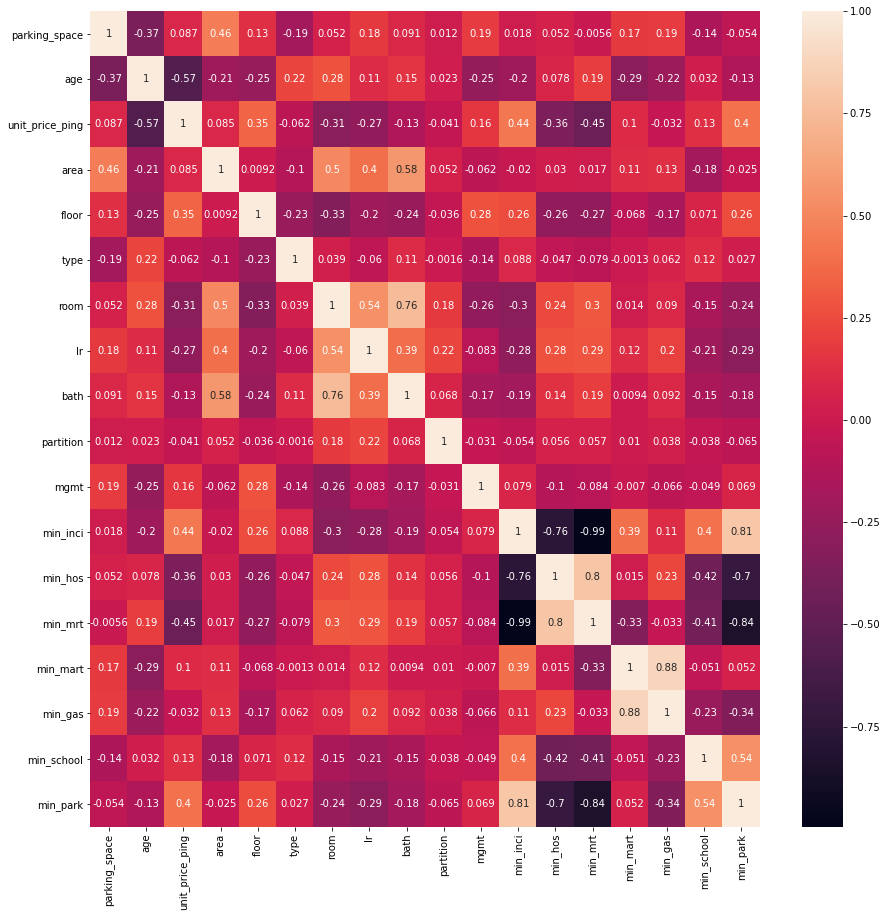

In [176]:
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, annot = True)

# 去極端值、無get_dummies、無調參 畫圖

# method1 to calculate importance feature

In [ ]:
test = permutation_importance(regressor, X_test_nor, Y_test)

In [ ]:
test_sorted_idx = test.importances_mean.argsort()
plt.figure(figsize = (8,8))
plt.barh(X.columns[test_sorted_idx], test.importances_mean[test_sorted_idx])

# method2 to calculate importance feature

In [ ]:
regressor.feature_importances_

In [ ]:
sorted_idx = regressor.feature_importances_.argsort()

In [ ]:
plt.figure(figsize = (8,8))
plt.barh(X.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel('xgboost feature importance')

In [ ]:
import seaborn as sns

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X_train[X_train.columns[sorted_idx]])

In [ ]:
correlation_heatmap(X_train[X_train.columns[test_sorted_idx]])

# Loss function

In [ ]:
# split data
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.2)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_nor = scaler.transform(X_train)
X_test_nor = scaler.transform(X_test)


# error list
n = [10, 100, 150, 300, 500, 600, 700, 800 ,1001]
training_errors = []
test_errors = []
test_r2s = []


for estimators in n :
    loss_regressor = xgb.XGBRegressor(
        n_estimators = estimators,
        max_depth = 4,
        n_jobs = -1
    )
    
    loss_regressor.fit(X_train_nor, Y_train)
    Y_pred_train = loss_regressor.predict(X_train_nor)
    Y_pred_test = loss_regressor.predict(X_test_nor)
    
    training_err = mean_squared_error(Y_train, Y_pred_train)
    training_errors.append(training_err)
    test_err = mean_squared_error(Y_test, Y_pred_test)
    test_errors.append(test_err)
    test_r2 = r2_score(Y_test, Y_pred_test)
    test_r2s.append(test_r2)

In [ ]:
error_table = pd.DataFrame()
error_table['n'] = n
error_table['training_error'] = training_errors
error_table['test_error'] = test_errors
error_table['r2'] = test_r2s
error_table

In [ ]:
plt.plot(error_table['n'], error_table['training_error'], label = 'Training Error')
plt.plot(error_table['n'], error_table['test_error'], label = 'Test Error')
plt.figure(figsize = (8,8))
plt.show()

# 各區初始r2

In [ ]:
house_without_outliers_no100['section'].unique()

In [ ]:
groupby_section = house_without_outliers_no100.groupby('section')

In [ ]:
groupby_section.size()

In [ ]:
a = 0
for i in range(1, 29):
    if i not in (11, 17):
        data = groupby_section.get_group(i)
        X = data.drop('unit_price_ping', axis = 1)
        Y = data['unit_price_ping']
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_nor = scaler.transform(X_train)
        X_test_nor = scaler.transform(X_test)
        regressor = xgb.XGBRegressor(
            n_estimators = 1000, 
            max_depth = 7,
            learning_rate = 0.05,
            n_jobs = -1
        )
        
        regressor.fit(X_train_nor, Y_train)
        Y_pred = regressor.predict(X_test_nor)
        
#         print(f"section{i}_rmse: {mean_squared_error(Y_test, Y_pred, squared = False)}")
#         print(f'section{i}_r2: {r2_score(Y_test, Y_pred)}')
        if r2_score(Y_test, Y_pred) < 0.5 :
            print(f'section{i}_r2: {r2_score(Y_test, Y_pred)}')
            a += 1
print(a)

In [ ]:
house_without_outliers = house_without_outliers_no100[~house_without_outliers_no100['section'].isin([12, 13, 21, 27])]

In [ ]:
house_without_outliers.shape

In [ ]:
house = house_without_outliers.groupby('section')

In [ ]:
house.size().index.tolist()

In [ ]:
a = 0
total = 0
for i in range(1,2):
    total += 1
    data = house.get_group(i)
    X = data.drop('unit_price_ping', axis = 1)
    Y = data['unit_price_ping']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_nor = scaler.transform(X_train)
    X_test_nor = scaler.transform(X_test)
    regressor = xgb.XGBRegressor(
        n_estimators = 1000, 
        max_depth = 7,
        learning_rate = 0.05,
        n_jobs = -1
    )

    regressor.fit(X_train_nor, Y_train)
    Y_pred = regressor.predict(X_test_nor)

#         print(f"section{i}_rmse: {mean_squared_error(Y_test, Y_pred, squared = False)}")
#         print(f'section{i}_r2: {r2_score(Y_test, Y_pred)}')
    if r2_score(Y_test, Y_pred) < 0.5 :
        print(f'section{i}_r2: {r2_score(Y_test, Y_pred)}')
        
        a += 1
    print(len(Y_pred))
    print(Y_pred)
print(f"total: {total}")
print(f"r2 < 0.5: {a}")

In [ ]:
X

# app.py


In [ ]:
house_model = joblib.load('finalized_model.sav')
house_model

In [ ]:
house_without_outliers.columns

In [ ]:
X = pd.Series([1, 0, 23, 34, 5, 0, 3, 1, 2, 0, 0, 1, 0.5, 0.9, 0.5, 0.2, 0.1, 0.3])

In [ ]:
X = X.to_numpy()

In [ ]:
X = X.reshape(1, 18)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X.rename(columns = {0: 'section', 1: 'parking_space', 2: 'age', 3: 'area', 4: 'floor', 5: 'type', 6: 'room', 7: 'lr', 8: 'bath', 9: 'partition', 10: 'mgmt', 11: 'min_inci', 12: 'min_hos', 13: ''})

In [ ]:
scaler = preprocessing.StandardScaler().fit(X) 

In [ ]:
X_nor = scaler.transform(X)

In [ ]:
X_nor.shape

In [ ]:
Y_pred = house_model.predict(X_nor)